# Scatter plot

In this notebook we will give an example of [*scatter plot*](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

# Modules

* For the netCDF file reading, we will use [cf-python](http://cfpython.bitbucket.org/), a powerful tool for manipulating netCDF files.
* For the plotting, we will use [bokeh](http://bokeh.pydata.org/en/latest/), which offers interactive plots.

In [1]:
import numpy as np
import cf
import netCDF4
import matplotlib.pyplot as plt

#Files and data

We will simply take the temperature, salinity and chlorophyll concentration measurements collected during a cruise.
All the data are stored in the same file, available through OPEnDAP.

In [2]:
ctdfile = 'http://thredds.socib.es/thredds/dodsC/research_vessel/ctd/socib_rv-scb_sbe9002/L1/2015/dep0009_socib-rv_scb-sbe9002_L1_2015-04-23.nc'

## Reading the CTD data - 1st method

We don't know how the variables are named in the file, but we can get a list of variables:

In [3]:
with netCDF4.Dataset(ctdfile) as nc:
    variableNames = nc.variables.keys() 
    print variableNames

[u'trajectory', u'time', u'LAT', u'LON', u'DEPTH', u'WTR_PRE', u'WTR_TEM_01', u'QC_WTR_TEM_01', u'WTR_TEM_02', u'QC_WTR_TEM_02', u'COND_01', u'QC_COND_01', u'COND_02', u'QC_COND_02', u'SALT_01', u'QC_SALT_01', u'SALT_02', u'QC_SALT_02', u'OXI_CON', u'QC_OXI_CON', u'CHLO', u'QC_CHLO', u'TURB', u'QC_TURB', u'NET_RAD']


Two variables correspond to sea water temperature: WTR_TEM_01 and WTR_TEM_02, and two variables correspond to sea water salinity: SALT_01 and SALT_02. For the chlorophyll concentration, there is only CHLO.<br/>
Let's load this variables.

In [4]:
with netCDF4.Dataset(ctdfile) as nc:
    temperature1 = nc.variables['WTR_TEM_01'][:]
    temperature2 = nc.variables['WTR_TEM_02'][:]
    salinity1 = nc.variables['SALT_01'][:]
    salinity2 = nc.variables['SALT_02'][:]
    chlorophyll = nc.variables['CHLO'][:]

As the CTD has two sensors for temperature and salinity, we will compute the mean between the two sets of measurements for each variable. We could also load data from only one of the sensors. 

In [5]:
temperature = 0.5 * (temperature1 + temperature2)
salinity = 0.5 * (salinity1 + salinity2)

## Reading the CTD data - 2nd method

If don't want to look for the names of the variables, we can use _cf-python_ is. We only need to know the standard names for these variables: that we don't have to know the name of the variable: we simply specify that we want the variables with standard names (according to [CF conventions](http://cfconventions.org/)): 
* _sea_water_temperature_ 
* _sea_water_salinity_
* _"mass_concentration_of_chlorophyll_in_sea_water_.

In [6]:
f = cf.read(ctdfile)
temperature_cf = 0.5 * (f.select('sea_water_temperature')[0].array + f.select('sea_water_temperature')[1].array)
salinity_cf = 0.5 * (f.select('sea_water_practical_salinity')[0].array + f.select('sea_water_practical_salinity')[1].array)
chlorophyll_cf = f.select('mass_concentration_of_chlorophyll_in_sea_water')[0].array

# Making the plot

For a scatter plot, the first two dimensions indicate the coordinates, while the 3rd dimension (chlorophyll concentration) determines the color of the dots.

## 1st version

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


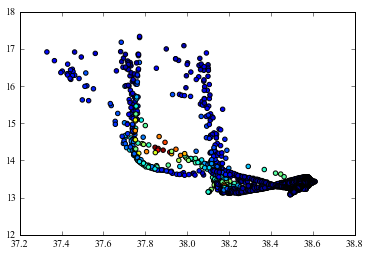

In [7]:
%matplotlib inline
plt.scatter(salinity, temperature, c=chlorophyll)
plt.show()

It works, so we can prepare something better.

## 2nd version

In [8]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})
cmap = plt.cm.RdYlBu_r

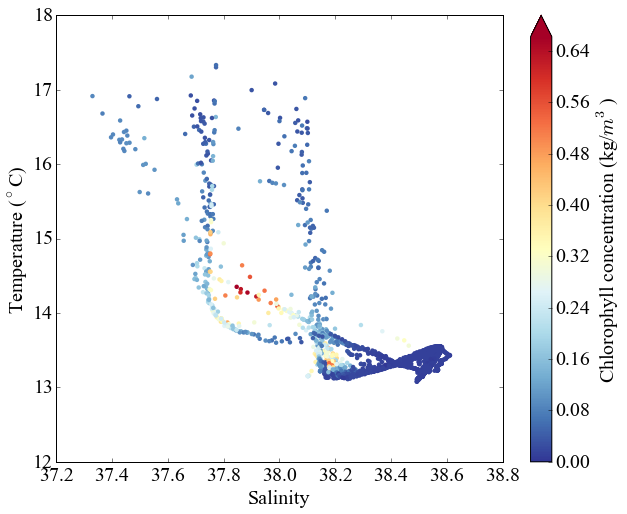

In [9]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(salinity, temperature, c=chlorophyll, edgecolor='None', cmap=cmap)
plt.xlabel('Salinity')
plt.ylabel('Temperature ($^{\circ}$C)')
cbar = plt.colorbar(extend='max')
cbar.set_label('Chlorophyll concentration (kg/$m^3$)')
plt.savefig('../../figures/scatter_chloro.png', dpi=300)
plt.show()